code menggunakan metode LSTM (long-short term memory) dan menggunakan dataset dari API

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Mendapatkan data dari CoinGecko API
import requests
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'
response = requests.get(url)
data = response.json()

In [3]:
# Mengonversi data ke DataFrame
prices = data['prices']
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

In [4]:
# Skalakan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1, 1))

In [5]:
# Siapkan data untuk model LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Melatih model
model.fit(X, y, epochs=25, batch_size=32)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - loss: 0.4421
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0372
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0208
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0089
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0092
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0078
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0082
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0066
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0065
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0069
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0058
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0061
Epoch 13/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0063
Epoch 14/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0071
Epoch 15/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0063
Epo

In [8]:
# Memprediksi harga
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


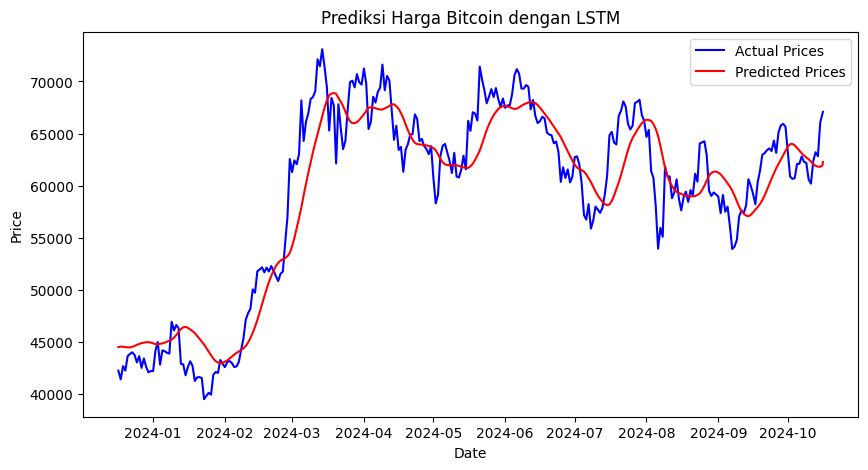

In [9]:
# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.plot(df.index[sequence_length:], df['price'][sequence_length:], color='blue', label='Actual Prices')
plt.plot(df.index[sequence_length:], predicted_prices, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prediksi Harga Bitcoin dengan LSTM')
plt.legend()
plt.show()